In [1]:
#equilibrium.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 16 March 2018.
#plot ringlet at/near equilibrium

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'radial_width = ', radial_width
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 241)
total_ring_mass =  2.4e-11
shear_viscosity =  -1e-11
bulk_viscosity =  -1e-11
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.0025, 'e_prime': 0.8472379923905368}
radial_width =  0.0005
e.min() =  0.002286488167119423
e.max() =  0.0027132368589952273


In [3]:
#time in units of orbits
times_orbits = times/(2*np.pi)

In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [5]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
    orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)

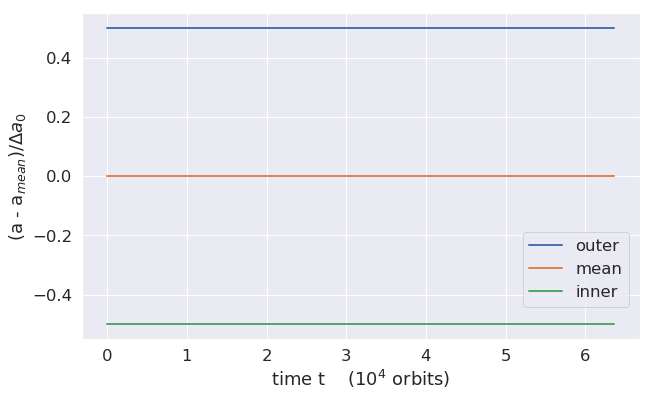

In [6]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_orbits/1.0e4
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.legend(loc=(0.79, 0.1))

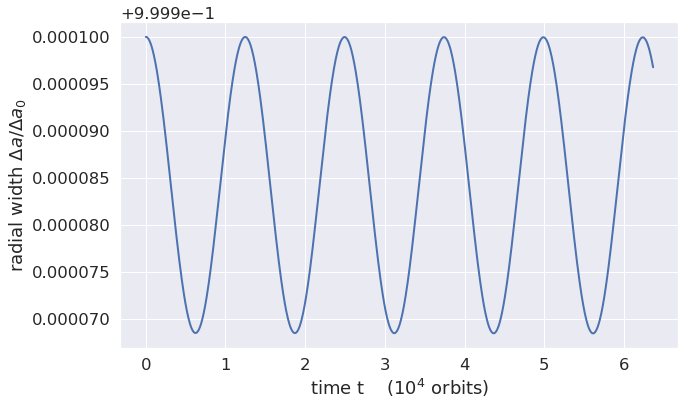

In [7]:
#plot delta_a versus time
x = times_orbits/1.0e4
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')

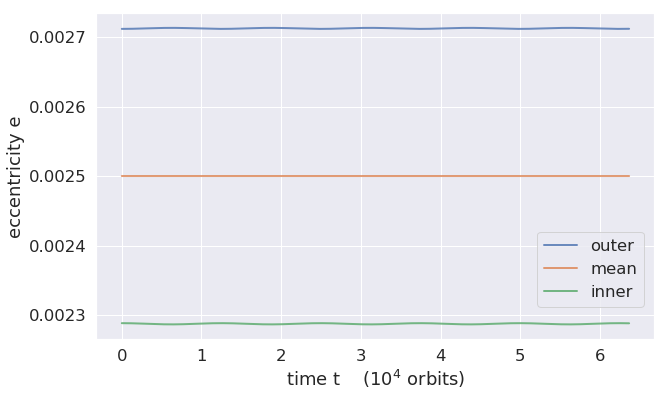

In [8]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_orbits/1.0e4
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.legend(loc=(0.79, 0.1))

In [9]:
#equilibrium dwt and de
idx = (times_orbits > -1)
dwt_eq = np.median(dwt[idx])
print 'dwt_eq = ', dwt_eq
de_eq = np.median(de[idx])
print 'de_eq = ', de_eq

dwt_eq =  -3.689079027170694e-05
de_eq =  0.00042503973290349516


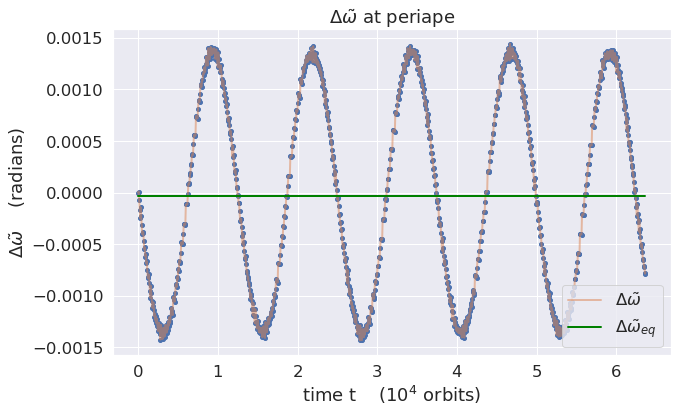

In [10]:
#plot dwt versus time
x = times_orbits/1.0e4
y = dwt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none', label='')
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.5, label=r'$\Delta\tilde{\omega}$')
y = x*0 + dwt_eq
p = ax.plot(x, y, linestyle='-', linewidth=2, color='green', label=r'$\Delta\tilde{\omega}_{eq}$')
p = ax.set_title(r'$\Delta\tilde{\omega}$ at periape')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
p = plt.legend()

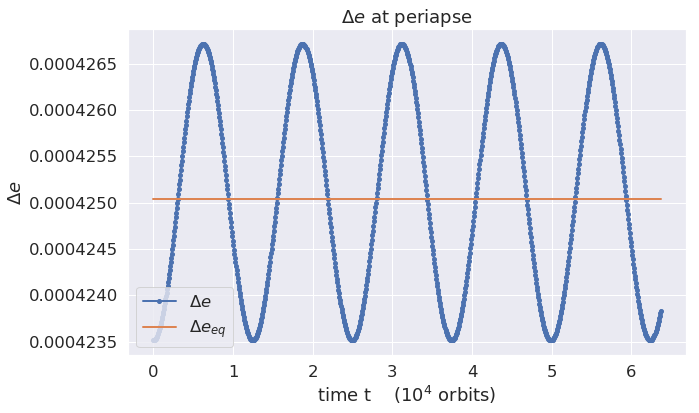

In [11]:
#plot delta_e versus time
x = times_orbits/1.0e4
y = de
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = x*0 + de_eq
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e_{eq}$')
p = ax.set_title(r'$\Delta e$ at periapse')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

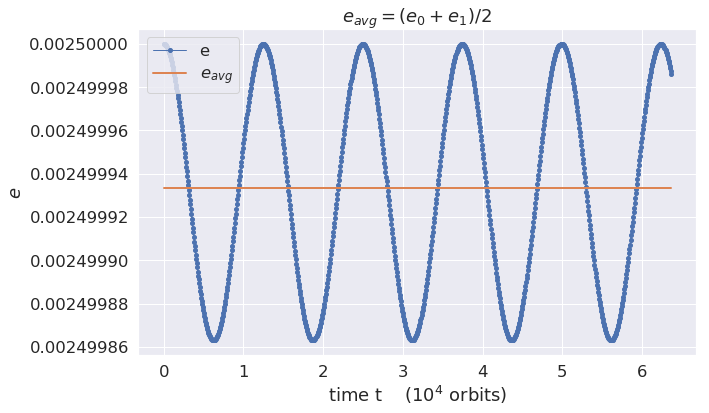

In [12]:
#plot e_avg versus time
x = times_orbits/1.0e4
y = e_mean
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=1, label='e')
e_avg = e_mean.mean()
y = x*0 + e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$e_{avg}$')
p = ax.set_title(r'$e_{avg} = (e_0+e_1)/2$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$e$')
p = plt.legend()

In [13]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H[idx].mean()

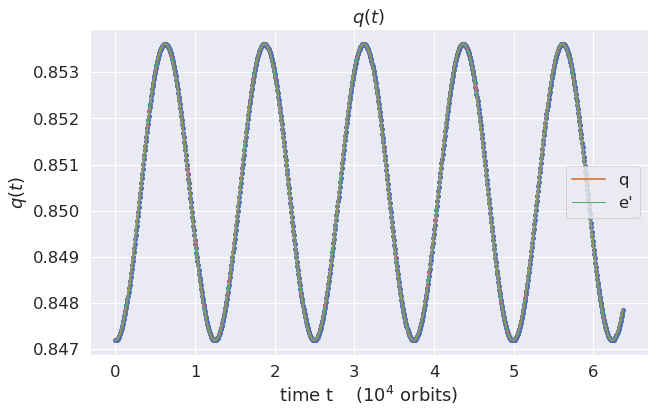

In [14]:
#plot q versus time
x = times_orbits/1.0e4
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=1, linewidth=2, label='q')
y = e_prime
p = ax.plot(x, y, linestyle='-', alpha=1, linewidth=1, label="e'")
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$q(t)$')
p = ax.legend()

H.mean() =  1.2452043235996746


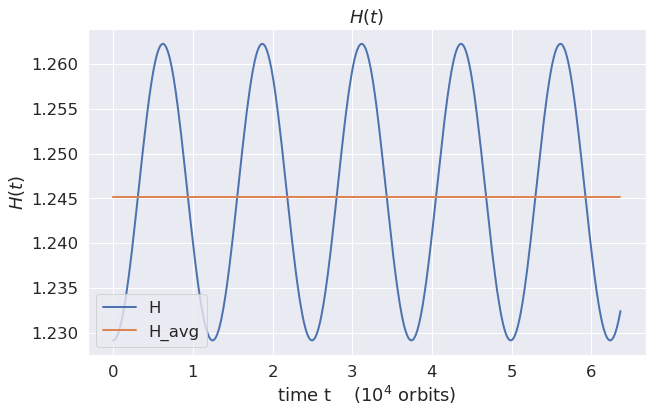

In [15]:
#plot H(q2) versus time
x = times_orbits/1.0e4
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label='H')
y = x*0 + H_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, label='H_avg')
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$H(t)$')
p = plt.legend()
print 'H.mean() = ', H.mean()

In [16]:
#integral of motion from BGT
Ix = (de - de_eq)*a_mean/da
Iy = e_mean*a_mean*(dwt - dwt_eq)/da
I = np.sqrt(Ix**2 + Iy**2)
I_avg = I[idx].mean()
print 'I_avg = ', I_avg

I_avg =  0.005131857280069593


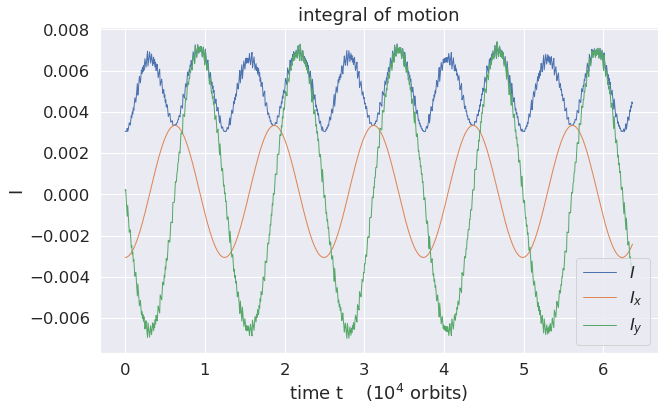

In [17]:
#plot I versus time
x = times_orbits/1.0e4
y = I
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1, label=r'$I$')
p = ax.plot(x, Ix, linestyle='-', linewidth=1, label=r'$I_x$')
p = ax.plot(x, Iy, linestyle='-', linewidth=1, label=r'$I_y$')
p = ax.set_title(r'integral of motion')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel('I')
p = plt.legend()

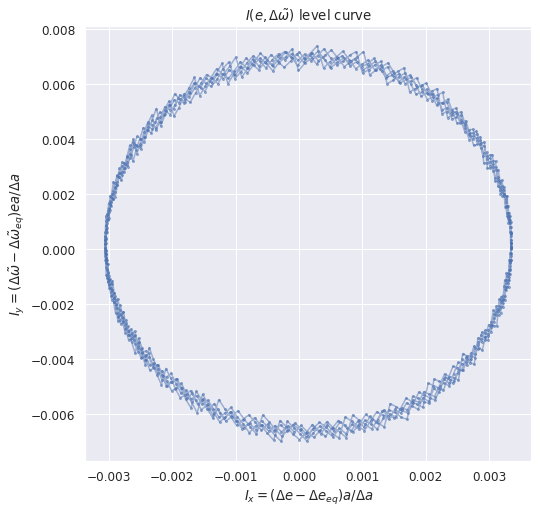

In [18]:
#plot (Ix, Iy)
sns.set(font_scale=1.1, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(8, 8))
p = ax.set_title(r'$I(e, \Delta\tilde{\omega})$ level curve')
p = ax.set_xlabel(r'$I_x = (\Delta e - \Delta e_{eq})a/\Delta a$')
p = ax.set_ylabel(r'$I_y = (\Delta\tilde{\omega} - \Delta\tilde{\omega}_{eq})ea/\Delta a$')
x = Ix
y = Iy
p = ax.plot(x, y, marker='o', markersize=2, linestyle='-', alpha=0.5)

In [19]:
#BGT libration period
GM = 1.0
M_central = 1.0
a3 = (a_mean**3).mean()
a_over_da = (a_mean/da).mean()
n = np.sqrt(GM/a3)
omega_bgt = (total_ring_mass/M_central)*(a_over_da**2)*n*H_avg/np.pi
T_bgt = 2*np.pi/omega_bgt
print 'BGT libration frequency = ', omega_bgt
print 'BGT libration period (10^4 orbits) = ', T_bgt/1.0e4

BGT libration frequency =  3.8052217235888946e-05
BGT libration period (10^4 orbits) =  16.512008402111192


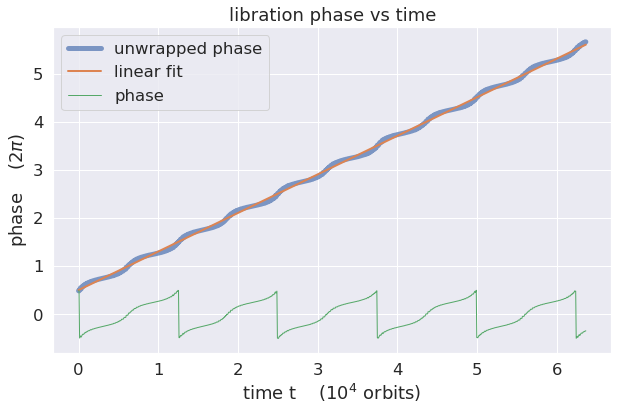

In [20]:
#compute libration phase & frequency
phase = np.arctan2(Iy, Ix)
phase_unwrapped = unwrap_angle(phase)
coeff = np.polyfit(times, phase_unwrapped, 1)
omega = coeff[0]
phase_fit = coeff[1] + coeff[0]*times
x = times/(2*np.pi)/1.0e4
y = phase_unwrapped/(2*np.pi)
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=5, alpha=0.7, label='unwrapped phase')
y = phase_fit/(2*np.pi)
p = ax.plot(x, y, linestyle='-', linewidth=2, label='linear fit')
y = phase/(2*np.pi)
p = ax.plot(x, y, linestyle='-', linewidth=1, label='phase')
p = ax.set_title('libration phase vs time')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'phase    ($2\pi$)')
p = plt.legend()

In [21]:
#simulation's libration frequency
twopi = 2.0*np.pi
T = twopi/omega
print 'omega, omega_bgt = ', omega, omega_bgt
print 'omega/omega_bgt = ', omega/omega_bgt
print 'T, T_bgt (10^4 orbits) = ', T/(twopi*1.0e4), T_bgt/(twopi*1.0e4)

omega, omega_bgt =  8.003870212034084e-05 3.8052217235888946e-05
omega/omega_bgt =  2.103391285300777
T, T_bgt (10^4 orbits) =  1.2493955717778467 2.6279677575709046


In [22]:
#estimated e_prime and wt_prime at the equilibrium fixed point
print 'e_prime = ', e_prime[idx].mean()
print 'wt_prime = ', wt_prime[idx].mean()

e_prime =  0.8503204315234827
wt_prime =  -4.537155765558079e-05
